# Przetwarzanie i analiza sygnału EKG
### Mirosław Kuźniar, nr indeksu: 248870

### Ćwiczenie 3

In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Celem cwiczenia jest obserwacja widma sygnału EKG.

a) Wczytac sygnał ekg100.txt i ocenic go wizualnie na wykresie

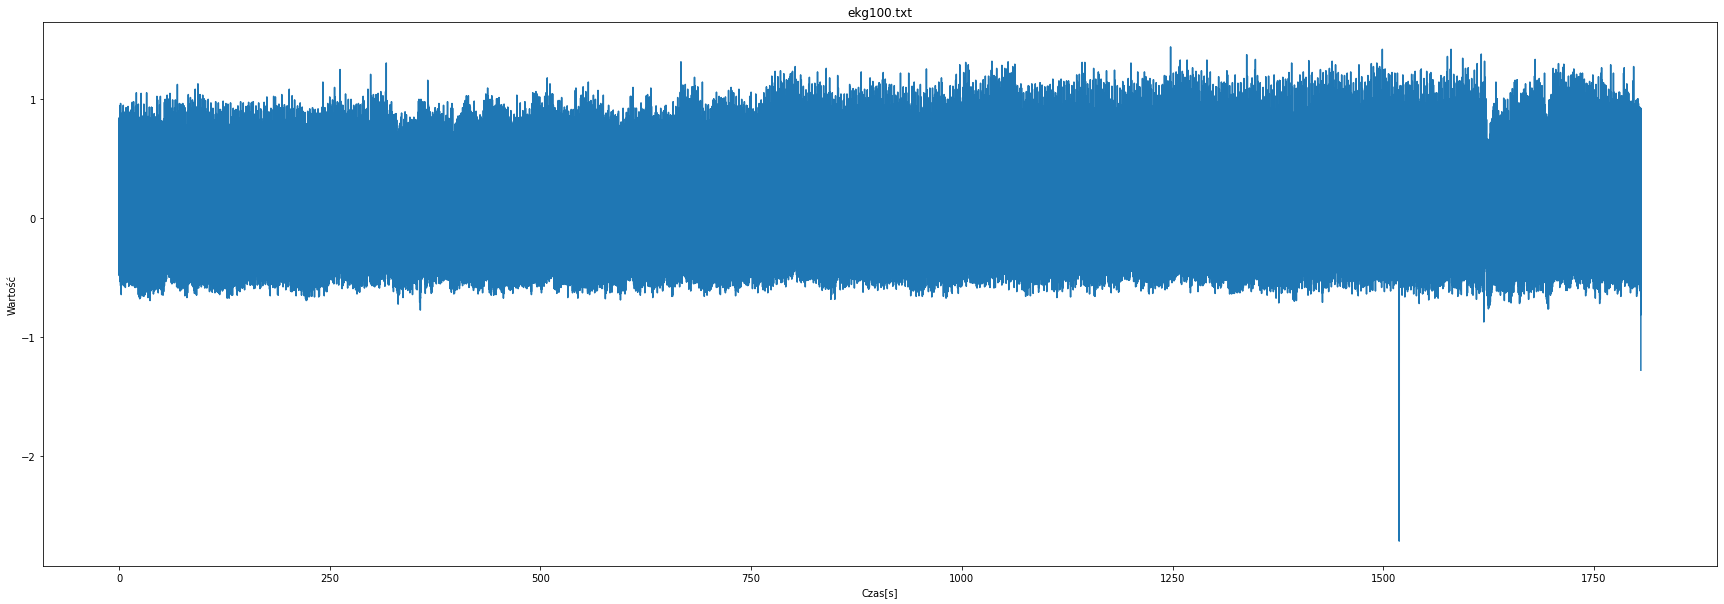

In [3]:
ekg100 = pd.read_csv('../ekg100.txt', names=['1']) # wczytanie sygnału ekg100 z pliku
sampling_frequency_ekg100 = 360 # ustawienie częstotliwości próbkowania

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 # ustalenie punktów na osi czasu
ekg100 = ekg100.set_index('Czas') # ustawienie czasu jako indexu tabeli

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(ekg100)
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.show()

b) Wyznaczyc jego dyskretna transformate Fouriera i przedstawic widmo amplitudowe
sygnału w funkcji czestotliwosci w zakresie [0, fs/2], gdzie fs oznacza
czestotliwosc próbkowania.

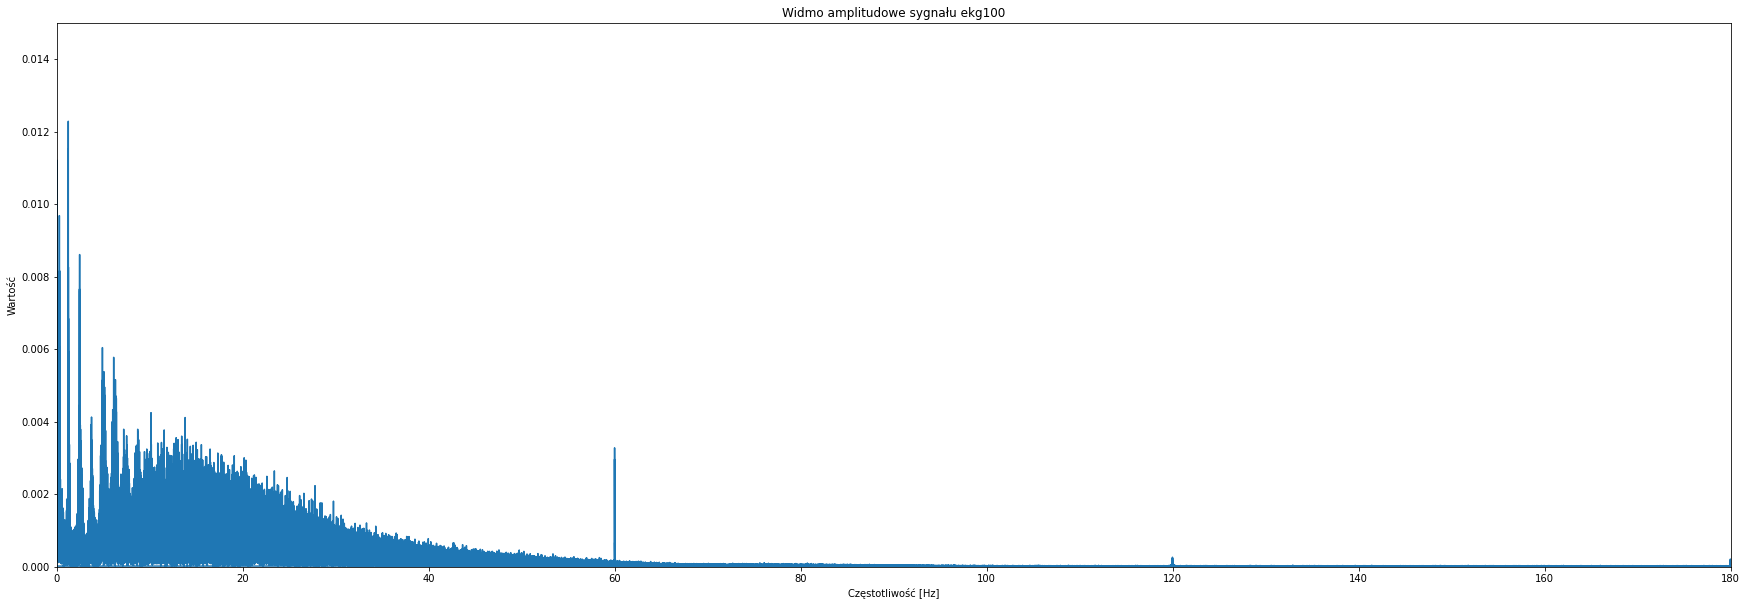

In [4]:
x = np.fft.fftfreq(ekg100.size, 1/sampling_frequency_ekg100) # częstotliwości próbkowania Dyskretnej Transformaty Fouriera
y = ekg100['1'] - ekg100['1'].mean() 
y = np.abs(np.fft.fft(y))/(ekg100.size//2) # jednowymiarowa dyskretna transformata Fouriera
mask = x > 0

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(x, y)
plt.xlim([0,sampling_frequency_ekg100/2])
plt.ylim([0,0.015])
plt.title('Widmo amplitudowe sygnału ekg100')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')
plt.show()

c) Wyznaczyc odwrotna dyskretna transformate Fouriera ciagu wyznaczonego w
punkcie 2 i porównac otrzymany ciag próbek z pierwotnym sygnałem ekg100
(mozna wyznaczyc róznice sygnałów).

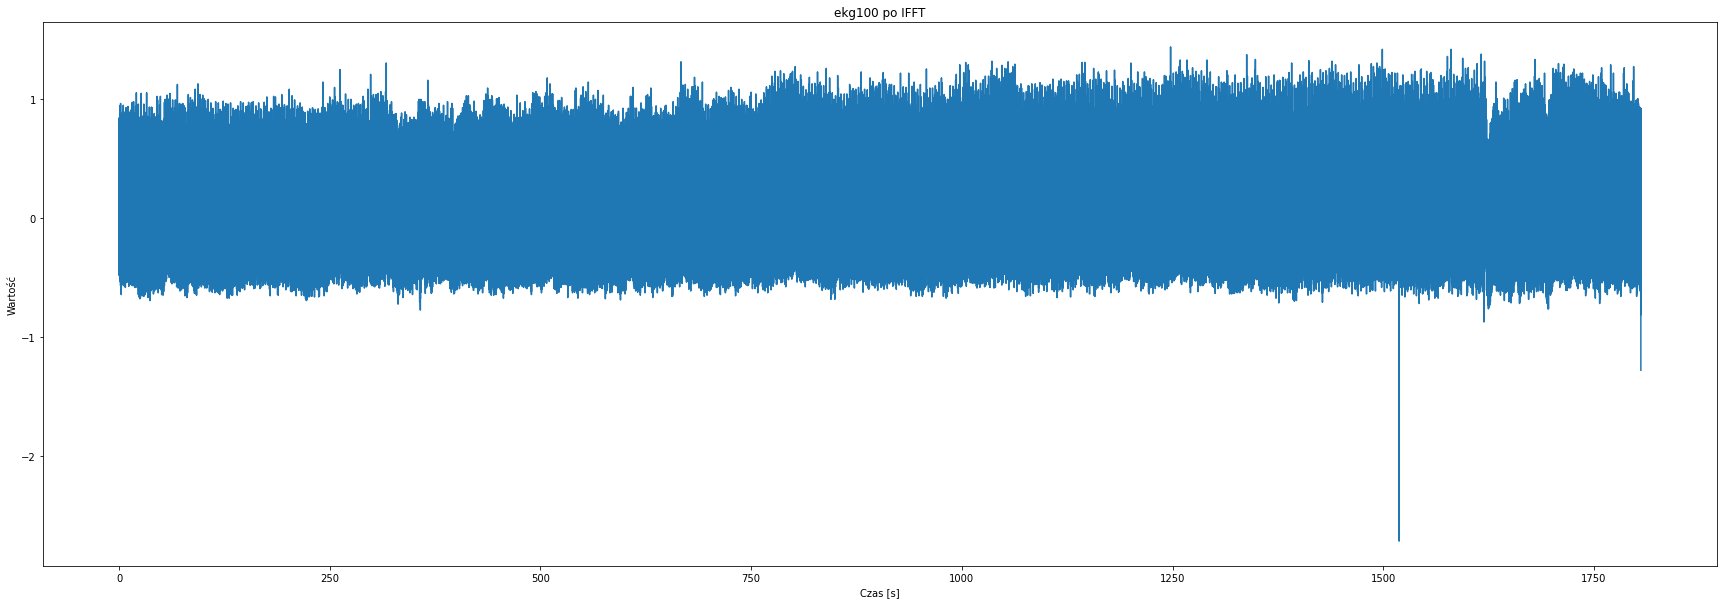

In [5]:
inverse = np.real(np.fft.ifft(y)) # jednowymiarowa odwrotna Dyskretna Transformata Fouriera

plt.figure(figsize=(30,10))

plt.subplot(1, 1, 1) # wyrysowanie wykresu
plt.plot(ekg100['1'] - inverse)
plt.title('ekg100 po IFFT')
plt.xlabel('Czas [s]')
plt.ylabel('Wartość')
plt.show()